# PyBer Analysis
---

## Preamble
---

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

In [2]:
# Files to load

ride_data_to_load = pd.read_csv("resources/ride_data.csv") 
city_data_to_load = pd.read_csv("resources/city_data.csv")

In [3]:
ride_data_df = pd.DataFrame(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


## Quality Control Checks
---

In [4]:
# Quality control checks
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
# Quality control checks
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [6]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
city_data_df = pd.DataFrame(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [9]:
# Quality control checks
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
# Quality control checks
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
# Get unique values for city data
city_data_df["type"].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

## DataFrame Generation
---

In [13]:
# Merge ride and city data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [14]:
# Creates dataframes that filters on urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [15]:
# Check proper filtering
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Check proper filtering
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [17]:
# Check proper filtering
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
# Rural Ride Count
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Urban Ride Count
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

# Suburban Ride Count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

In [19]:
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
# Rural Fare
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# Urban Fare
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

# Suburban Fare
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

In [23]:
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [24]:
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# Rural driver count
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

# Urban driver count
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

# Suburban driver count
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

In [27]:
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [28]:
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [29]:
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

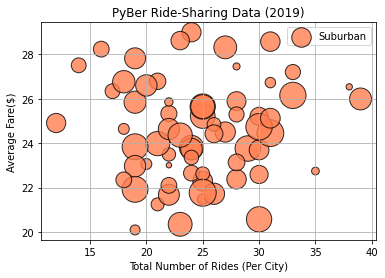

In [30]:
# Urban scatter plot
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            label="Suburban",
            color="coral",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

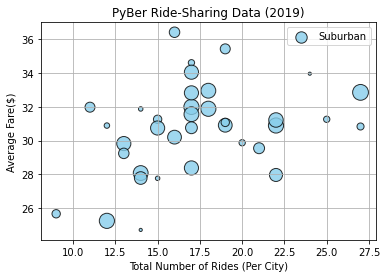

In [31]:
#Suburban scatter plot
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count,
            label="Suburban",
            color="skyblue",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

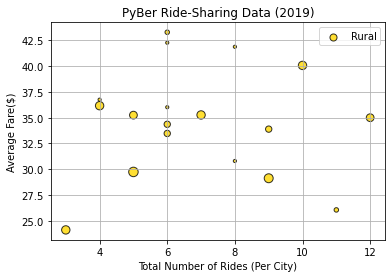

In [32]:
# Rural scatter plot
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count,
            label="Rural",
            color="gold",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend
plt.legend()

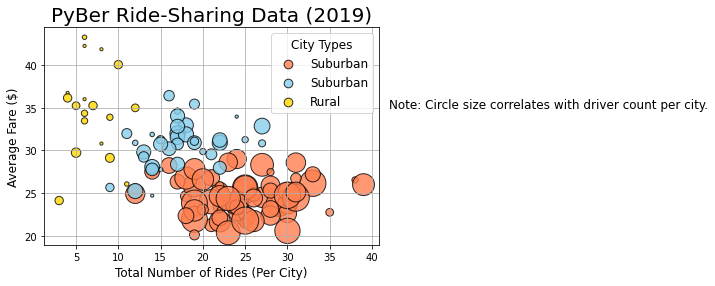

In [33]:
# All scatter plots
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count,
            label="Suburban",
            color="coral",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count,
            label="Suburban",
            color="skyblue",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count,
            label="Rural",
            color="gold",
           edgecolor="black",
            linewidths=1,
           alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize="20")
plt.xlabel("Total Number of Rides (Per City)", fontsize="12")
plt.ylabel("Average Fare ($)", fontsize="12")
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

plt.show()

In [35]:
# Save the figure
plt.savefig("r5_PyBer_Analysis/analysis/Fig1.png")

FileNotFoundError: [Errno 2] No such file or directory: 'r5_PyBer_Analysis/analysis/Fig1.png'

<Figure size 432x288 with 0 Axes>